# Spelplatser

Vad finns det att säga om var matcherna har spelats?

Jag har samlat in koordinaterna för alla allsvenska lags hemmaarenor för att kunna titta på saker som vilken säsong som var nordligast, och var varje säsong spelats i genomsnitt.

*OBS:* En del lag har bytt arena under årens gång. Det har jag inte tagit med i datan än så länge.

## Genomsnittlig spelplats, 1924-2023




Kartan visar den genomsnittliga spelplatsen för säsongerna 1924/1925-2023. Det är alltså genomsnitten av latituder och longituder till arenorna som det spelades matcher på under respektive säsong som ligger till grund för prickarna på kartan. (En del av koordinaterna är skrapade från Wikipedia och inte dubbelkollade.)

![Genomsnittlig spelplats, herrallsvenskan 1924/1925-2023](../plots/avg_spelplats_1924-2023.png)

*En interaktiv version av kartan finns längre ned i notebooken.*

Det ser ut som om det finns en viss pendelrörelse, med de allra tidigaste säsongerna längre västerut, 70-talet längre österut och senare tid någonstans mittemellan. Noterbart är också säsongerna 2016-2019 med både GIF Sundsvall och Östersunds FK i ligan, vilket drar upp snittet en bra bit norrut.

Longitud-grafen här nedan bekräftar bilden av en väst-östlig pendelrörelse.

![Genomsnittlig longitud, herrallsvenskan 1924/1025-2023](../plots/avg_lon_1924-2023.png)

Nord-sydligt verkar det inte finnas ett liknande mönster, även om det så kallade norrlandsfönstret är öppet i perioder och drar snittet norrut.

![Genomsnittlig latitud, herrallsvenskan 1924/1025-2023](../plots/avg_lat_1924-2023.png)


## Bortaresor

In [51]:
%matplotlib inline
import requests
import json
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import colormaps as cmaps

# plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.facecolor'] = '#e4e4e4'
plt.rcParams['axes.facecolor'] = '#e5e5dd'

In [7]:
# Import and prepare data

df = pd.read_csv('../data/allsvenskan.csv')
df['ppg_3pwin'] = (df.wins*3 + df.draws)/df.games
venues = pd.read_csv('../data/venues.csv')
# final_rounds = df[df['final'] == True]
final_rounds = df.query('final == 1')
since_2008 = df.loc[2008:]


In [43]:
# Plot average game location per season

import plotly.express as px

df_venues = final_rounds.merge(venues, on='team_id')
mean_coords = df_venues.pivot_table(values=['venue_lat', 'venue_lon'], index='year')

wh = 720

def plot_locations():
    center = dict(lat=mean_coords.venue_lat.mean()+.2, lon=mean_coords.venue_lon.mean())
    fig = px.scatter_mapbox(mean_coords, lat='venue_lat', lon='venue_lon', size='venue_lat', size_max=10, color=mean_coords.index, opacity=.7, center=center, color_continuous_scale='bluered', zoom=6.5, width=wh, height=wh)
    fig.update_layout(mapbox_style='carto-positron', paper_bgcolor='#D6D7D7', title=dict(text='Genomsnittlig spelplats, Allsvenskan 1924-2023', font=dict(family='serif', size=20)), margin=dict(autoexpand=True, l=25, t=50, r=25, b=25), font=dict(family='serif'))
    fig.show()

# Uncomment below to show interactive figure
#plot_locations()


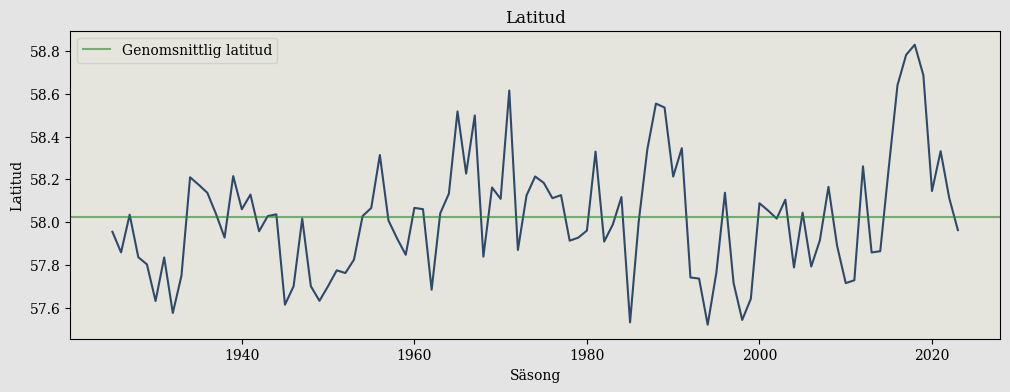

In [96]:
# Plot mean latitude

fig, ax = plt.subplots(figsize=(12, 4))
mean_coords.venue_lat.plot(title='Latitud', ax=ax, colormap='cividis', alpha=.8, xlabel='Säsong', ylabel='Latitud')
mean = ax.axhline(mean_coords.venue_lat.mean(), color='forestgreen', alpha=.6, label='Genomsnittlig latitud')
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles = handles[-1:])

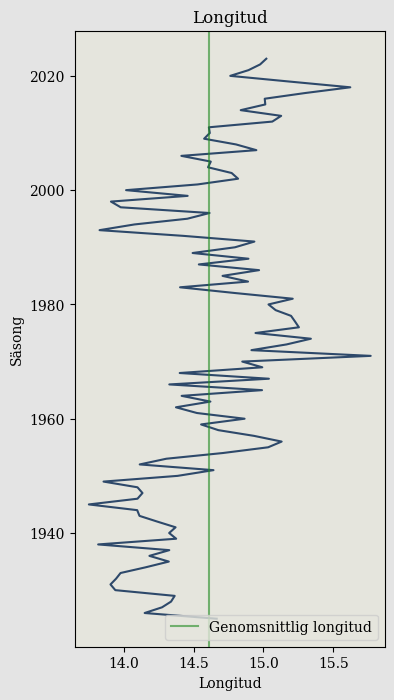

In [95]:
# Plot mean longitude

fig, ax = plt.subplots(figsize=(4, 8))
mean_coords.reset_index().plot(x='venue_lon', y='year', title='Longitud', ax=ax, colormap='cividis', alpha=.8, legend='', xlabel='Longitud', ylabel='Säsong')
ax.axvline(mean_coords.venue_lon.mean(), color='forestgreen', alpha=.6, label='Genomsnittlig longitud')
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles = handles[-1:], loc='lower right')

<Axes: xlabel='venue_lon'>

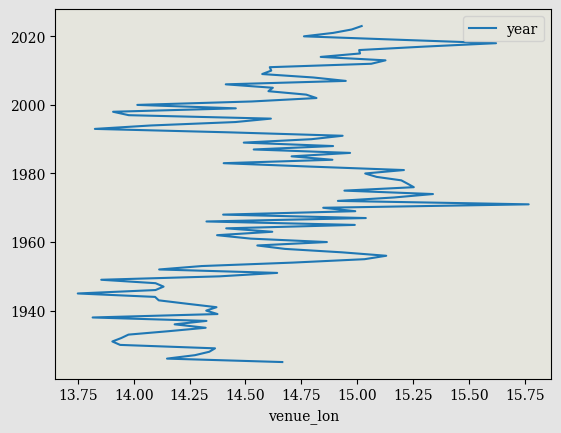

In [58]:
mean_coords.reset_index().plot(x='venue_lon', y='year')

In [ ]:
# Plot distances to away games


In [ ]:
#Distances per season

season = '1992'

dist = pd.read_json('data/distances.json')
dists = dist.loc[season].dropna().sort_values()
dists = dists/len(dists-1)
colors = plt.colormaps['plasma_r'](
    np.linspace(.15, .85, len(dists))
)
# dists.plot(kind='barh', cmap=cmap)
for i, ((t, d), c) in enumerate(zip(dists.items(), colors)):
    plt.barh(width=d, y=i, label=t, color=c)
plt.yticks(ticks=np.arange(0, len(dists)), labels=dists.keys());
plt.title(f'Genomsnittligt avstånd till bortaresor, allsvenskan {season}')
plt.xlabel('Avstånd (km)')